# Project: Investigate a Dataset (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Information 

A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?

This dataset contains information from 110,527 medical appointments in Brazil. One of the most important metrics being whether the patients show up to the appointment or not.

> **‘PatientId’** A number unique to each patient that identifies them

> **‘AppointmentID’** A number unique to each appointment that identifies them

> **‘Gender’** Patient's gender (M/F)

> **‘ScheduledDay’** The day on which the patient booked their appointment

> **‘AppointmentDay’** When's the appointment supposed to take place

> **‘Age’** Patient's age

> **‘Neighborhood’** Location of the hospital

> **‘Scholarship’** Shows whether the patient is enrolled in Brazil's welfare program or not

> **‘Hipertension’** Does the patient have hypertension?

> **‘Diabetes’** Does the patient have diabetes?

> **‘Alcoholism’** Does the patient suffer from alcoholism?

> **‘Handcap’** Is the patient handicapped? number of handicaps are written down in this column

> **‘SMS_received’** Has the patient received the SMS notification with their appointment details?

> **‘No-show’** Was this appointment a no-show? 'No' if the patient attended, 'Yes' if they did not attend

### Question(s) for Analysis

* What is the ratio of show to no show?

* Which day of week has the biggest rate of no-shows?

* Which locations have the biggest amount of no-shows?

* What is effect of having a scholarship on the rate of no-show?

* Which gender is more likely to not show up

* What is the impact of longer buffer between appointment booking & actual appointment date on no shows

* What is the effect of(being a handicap, having diabetes, having hypertension, being alcoholic and being sent a sms) on the ratio of absence?


In [109]:
# This cell is for all the packages required for this investigation
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [110]:
# Load dataset into pandas dataframe & view first 5 rows
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [111]:
# view the shape of the dataframe
df.shape

(110527, 14)

* 110,527 rows
* 14 columns

In [112]:
# view the properties of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Observations:
* Column names should be cleaner
* ScheduledDay & AppointmentDay dt should be DateTime

In [113]:
# check for duplicate rows
df.duplicated().sum()

0

Zero duplicated rows

In [114]:
# check for null objects
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [115]:
# check for number of unique patient IDs to see how many of the patients revisit the clinic
df['PatientId'].nunique()

62299

62,299 patients did not revisit/rebook the appointment

In [116]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Age column should be closely investigated
* min age = -1
* max age = 115

In [117]:
df[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


This row should be deleted in the data cleaning section, as the age is invalid.

In [118]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

Handicaps range from zero to four handicaps. 
<br></br>Column name should be renamed to Handicap instead of Handcap.

### Data Cleaning
* <b>Rename columns:</b> Make it more describtive, switch to lowercase, and edit spelling mistakes.
* <b>Fix Datatypes:</b> scheduled_day & appointment_day to be datetime, no_show to 0/1 instead of yes/no, convert 0/1 columns to boolean instead of int
* <b>Dropping outliers:</b> Investigate age column and remove unwanted row(s)

<u>Section A: Rename columns</u>

In [119]:
# edit typos & naming formatting for columns
df.rename(
    columns={'patientid':'patient_id', 'AppointmentDay':'appointment_day', 'AppointmentID':'appointment_id', 'ScheduledDay':'scheduled_day', 'Hipertension':'hypertension', 'Handcap':'handicap', 'No-show':'no_show'}, 
    inplace=True
)

# make all column names lowercase
df.columns = df.columns.str.lower()
df.head()

,patientid,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<u>Section B: Fix Data types</u>

Only include the date part in the scheduled_day & appointment_day columns

In [120]:
days = ['scheduled_day', 'appointment_day']
for day in days:
    df[day] = pd.to_datetime(pd.to_datetime(df[day]).dt.date)

df.dtypes

patientid                 float64
appointment_id              int64
gender                     object
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
age                         int64
neighbourhood              object
scholarship                 int64
hypertension                int64
diabetes                    int64
alcoholism                  int64
handicap                    int64
sms_received                int64
no_show                    object
dtype: object

In [121]:
df.head()

,patientid,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Convert no_shows column from 'yes'/'no' to 0/1

In [122]:
df['no_show'].value_counts()

No     88208
Yes    22319
Name: no_show, dtype: int64

In [123]:
df['no_show'].replace({'Yes': 1, 'No': 0}, inplace=True)
df['no_show'].value_counts()

0    88208
1    22319
Name: no_show, dtype: int64

Convert [scholarship, hypertension, diabetes, alcoholism, sms_received, no_show] to boolean.

In [124]:
# create list with columns names to iterate through
cols = ['scholarship', 'hypertension', 'diabetes', 'alcoholism', 'sms_received', 'no_show']

for col in cols:
    df[col] = df[col].astype('bool')

df.dtypes

patientid                 float64
appointment_id              int64
gender                     object
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
age                         int64
neighbourhood              object
scholarship                  bool
hypertension                 bool
diabetes                     bool
alcoholism                   bool
handicap                    int64
sms_received                 bool
no_show                      bool
dtype: object

<u>Section C: Removing invalid/redundant data</u>

Remove appointment_id column as it doesn't contribute to our analysis

In [125]:
df.drop(columns={'appointment_id'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patientid        110527 non-null  float64       
 1   gender           110527 non-null  object        
 2   scheduled_day    110527 non-null  datetime64[ns]
 3   appointment_day  110527 non-null  datetime64[ns]
 4   age              110527 non-null  int64         
 5   neighbourhood    110527 non-null  object        
 6   scholarship      110527 non-null  bool          
 7   hypertension     110527 non-null  bool          
 8   diabetes         110527 non-null  bool          
 9   alcoholism       110527 non-null  bool          
 10  handicap         110527 non-null  int64         
 11  sms_received     110527 non-null  bool          
 12  no_show          110527 non-null  bool          
dtypes: bool(6), datetime64[ns](2), float64(1), int64(2), object(2)
memory usag

Remove invalid data in age column

In [126]:
# remove rows where age is less than 0
df = df.loc[(df['age'] > 0)]
# remove rows where age is 115
df = df.loc[(df['age'] < 115)]
df['age'].describe()

count    106982.000000
mean         38.312501
std          22.460622
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         102.000000
Name: age, dtype: float64

<u>Section D: Adding buffer column</u>
<p>Buffer is the waiting time between the day the appointment was made, and the day the appointment is scheduled.</p>

In [127]:
df['buffer'] = df['appointment_day'] - df['scheduled_day']
df.tail()

,patientid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,buffer
110522,2.572134e+12,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,0,True,False,35 days
110523,3.596266e+12,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,0,True,False,35 days
110524,1.557663e+13,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,0,True,False,41 days
110525,9.213493e+13,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,0,True,False,41 days
110526,3.775115e+14,F,2016-04-27,2016-06-07,54,MARIA ORTIZ,False,False,False,False,0,True,False,41 days


In [128]:
# convert buffer column datatype to int to be able to operate on it later on
df['buffer'] = df['buffer'].dt.days

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106982 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patientid        106982 non-null  float64       
 1   gender           106982 non-null  object        
 2   scheduled_day    106982 non-null  datetime64[ns]
 3   appointment_day  106982 non-null  datetime64[ns]
 4   age              106982 non-null  int64         
 5   neighbourhood    106982 non-null  object        
 6   scholarship      106982 non-null  bool          
 7   hypertension     106982 non-null  bool          
 8   diabetes         106982 non-null  bool          
 9   alcoholism       106982 non-null  bool          
 10  handicap         106982 non-null  int64         
 11  sms_received     106982 non-null  bool          
 12  no_show          106982 non-null  bool          
 13  buffer           106982 non-null  int64         
dtypes: bool(6), datetime

In [130]:
# run a health check on buffer values
df['buffer'].describe()

count    106982.000000
mean         10.166645
std          15.263557
min          -6.000000
25%           0.000000
50%           4.000000
75%          14.000000
max         179.000000
Name: buffer, dtype: float64

Lowest value is -6 which is invalid, rows with negative buffer time should be dropped.

In [131]:
# drop rows with negative buffer days
df = df[df['buffer'] >= 0]
df['buffer'].describe()

count    106977.000000
mean         10.167214
std          15.263681
min           0.000000
25%           0.000000
50%           4.000000
75%          14.000000
max         179.000000
Name: buffer, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1: Ratio of no shows

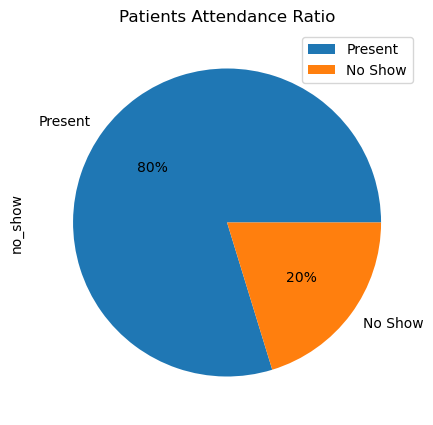

In [132]:
df['no_show'].value_counts().plot(kind='pie',  labels = ['Present', 'No Show'], figsize=(5, 5), autopct='%1.0f%%')
plt.title('Patients Attendance Ratio')
plt.legend()

Conclusion: 80% of the patients show up, while 20% do not.

### Question 2: Top locations with no shows

Top 10 neighbourhoods with no shows

<AxesSubplot: title={'center': 'Percentage of no shows per neighbourhood (Top 10)'}>

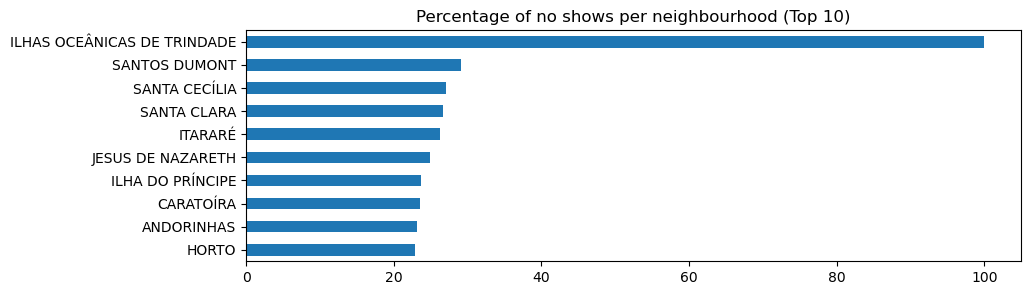

In [164]:
hood_shows = df['neighbourhood'].where(df['no_show'] == False).value_counts()
hood_no_shows = df['neighbourhood'].where(df['no_show'] == True).value_counts()
hoods = df['neighbourhood'].value_counts()

percentage_no_show = hood_no_shows / hoods * 100
percentage_no_show = percentage_no_show
percentage_no_show.sort_values()

percentage_no_show.nlargest(10).sort_values(ascending=True).plot(kind='barh', title='Percentage of no shows per neighbourhood (Top 10)', figsize=(10,3))

### Question 3: Correlation between buffer & no shows

Text(0.5, 1.0, 'Correlation between buffer days and no shows')

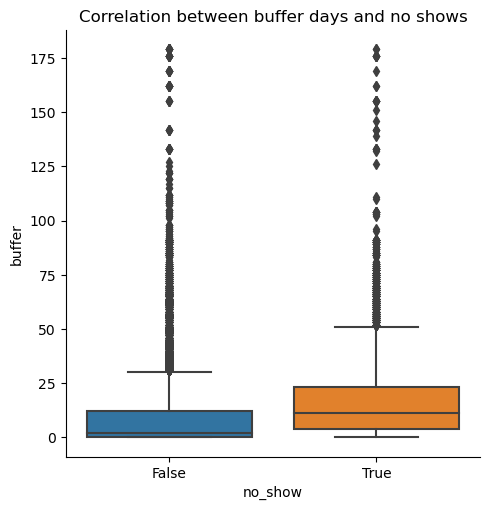

In [ ]:
sb.catplot(data=df, x="no_show", y="buffer", kind="box")
plt.title('Correlation between buffer days and no shows')

<b>Conclusion:</b> Boxplot's median is skewed towards the shorter buffer time, which means the time between appointments & actual visits is mostly on the shorter side.

<p>No shows have higher average buffer days.</p>

In [ ]:
show = df['no_show'] == False
noshow = df['no_show'] == True

df['buffer'][show].mean()

8.73782310532794

Average buffer days for shows = 8.7

In [ ]:
df['buffer'][noshow].mean()

15.793558508674788

Average buffer days for no shows = 15.7

In [ ]:
# list all buffer values against the average no shows for each value 
df['no_show'].groupby(df['buffer']).mean()

buffer
0      0.046860
1      0.213803
2      0.238698
3      0.235495
4      0.231965
         ...   
155    0.600000
162    0.181818
169    0.125000
176    0.375000
179    0.200000
Name: no_show, Length: 129, dtype: float64

Text(0.5, 1.0, 'Correlation between buffer time & rate of no shows')

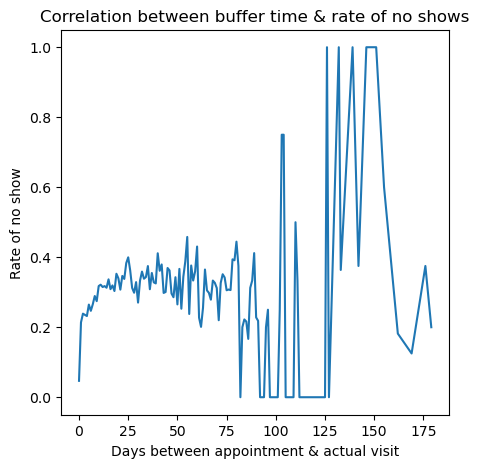

In [ ]:
# create a line plot for the relationship created in the code block above.
# buffer days to be on x axis
# no shows averages to be on y axis
df['no_show'].groupby(df['buffer']).mean().plot.line( figsize=(5, 5))
plt.xlabel('Days between appointment & actual visit')
plt.ylabel('Rate of no show')
plt.title('Correlation between buffer time & rate of no shows')

Conclusion: Rate of no show increases the more the buffer increases. There is a direct correlation between buffer & no shows.

### Question 4: Which day of week has the biggest rate of no shows?

In [ ]:
# extract the name of the day on which the appointment was scheduled and assign it to column 'weekday'
df['weekday'] = df['scheduled_day'].dt.day_name()
df['weekday'].value_counts()

Tuesday      25279
Wednesday    23541
Monday       22244
Friday       18373
Thursday     17518
Saturday        22
Name: weekday, dtype: int64

In [ ]:
# create a mask to facilitate visualization
show = df['no_show'] == False
noshow = df['no_show'] == True

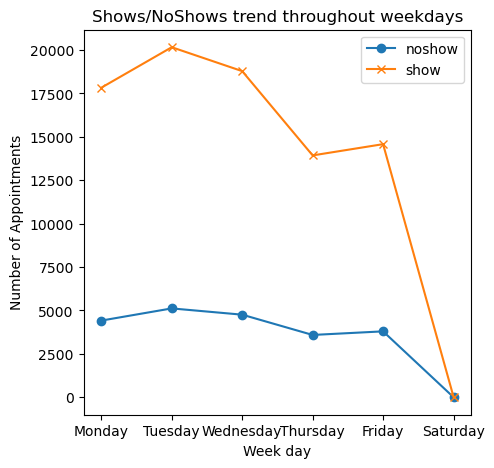

In [ ]:
# day_order array will be used below to arrange the days in the correct order on x-axis
day_order = np.array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
# get the weekday values that match the attached mask 
# then group the values & count them
# then arrange the days on the x-axis using .loc[]
df['weekday'][noshow].value_counts().loc[day_order].plot.line(label='noshow', figsize=(5, 5), marker='o')
df['weekday'][show].value_counts().loc[day_order].plot.line(label='show', figsize=(5, 5), marker='x')
plt.title('Shows/NoShows trend throughout weekdays')
plt.xlabel('Week day')
plt.ylabel('Number of Appointments')
plt.legend()

<b>Conclusion:</b> Line is trending the same for both shows and no shows. <u>No correlation between week days & no shows.</u>

### Question 5: Which gender is more likely to show up?

In [ ]:
# create a mask to facilitate visualization
male = df['gender'] == 'M'
female = df['gender'] == 'F'

Text(0.5, 1.0, 'Male Attendance')

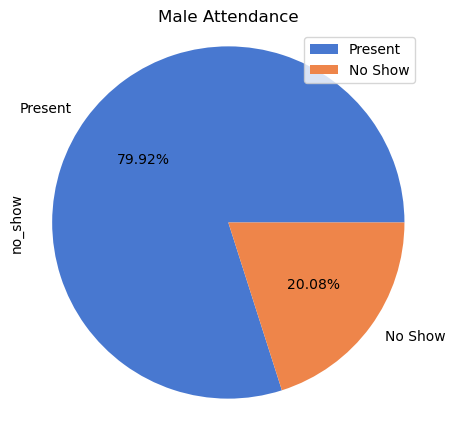

In [ ]:
# use seaborn to assign a color palette to the pie chart
colors = sb.color_palette('muted')[0:5]
# pie chart for males comparing shows vs no shows
df['no_show'][male].value_counts().plot(kind='pie', labels=['Present', 'No Show'], colors=colors,figsize=(5,5), autopct='%1.2f%%')
plt.axis('equal')
plt.legend()
plt.title('Male Attendance')

Text(0.5, 1.0, 'Female Attendance')

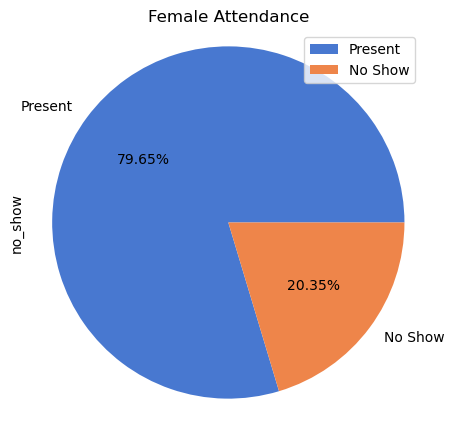

In [ ]:
# pie chart for males comparing shows vs no shows
df['no_show'][female].value_counts().plot(kind='pie', labels=['Present', 'No Show'], colors=colors,figsize=(5,5), autopct='%1.2f%%')
plt.axis('equal')
plt.legend()
plt.title('Female Attendance')

<b>Conclusion</b>: Almost identical break down of shows/noshows for men and women. <u>No correlation.</u>

### Question 6: Is there a correlation between having a scholarship and no shows?

In [ ]:
# create a mask to facilitate visualization
scholarship = df['scholarship'] == True
no_scholarship = df['scholarship'] == False

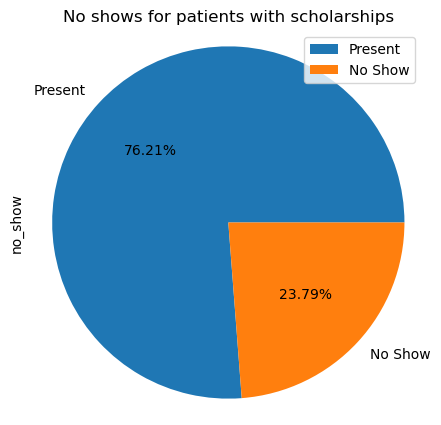

In [ ]:
df['no_show'][scholarship].value_counts().plot(kind='pie', labels=['Present', 'No Show'], figsize=(5,5), autopct='%1.2f%%')
plt.axis('equal')
plt.title('No shows for patients with scholarships')
plt.legend()

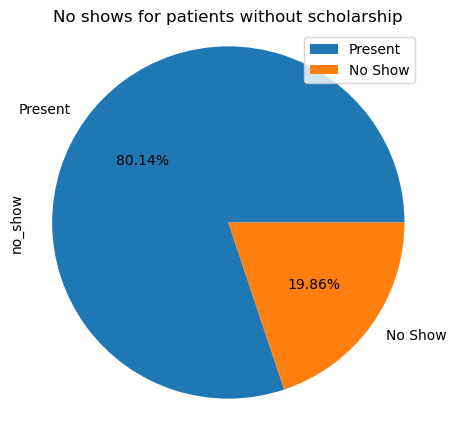

In [ ]:
df['no_show'][no_scholarship].value_counts().plot(kind='pie', labels=['Present', 'No Show'], figsize=(5,5), autopct='%1.2f%%')
plt.axis('equal')
plt.title('No shows for patients without scholarship')
plt.legend()

<b>Conclusion:</b> Patients without scholarship are 4% more likely to attend their scheduled appointment.

### Question 7: What is the effect of the following attributes on no shows? <br>
* Diabetes
* Alcoholism
* Hypertension
* Handicap
* Receiving SMS Notification

In [ ]:
# create a function to reduce code & reuse while visualizing multiple similar attributes
def pie(df, col):
    true = df[col] == True
    df['no_show'][true].value_counts().plot(kind='pie', labels=['Present', 'No Show'], figsize=(5,5), autopct='%1.0f%%')
    plt.axis('equal')
    plt.title(col)
    plt.legend()

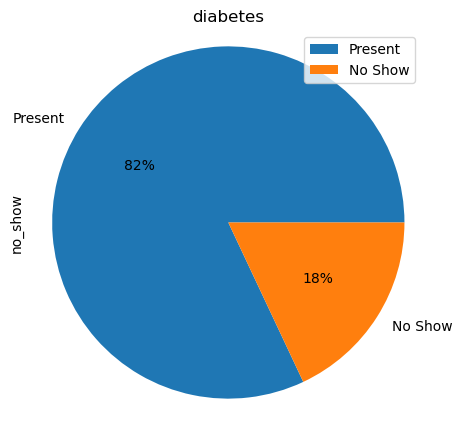

In [ ]:
pie(df,'diabetes')

<b>Conclusion:</b> Almost the same ratio as the normal no show ratio. <u>No Correlation</u>

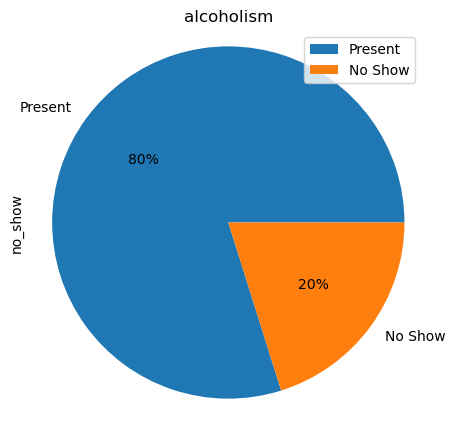

In [ ]:
pie(df, 'alcoholism')

<b>Conclusion:</b> Same ratio as the normal no show ratio. <u>No Correlation</u>

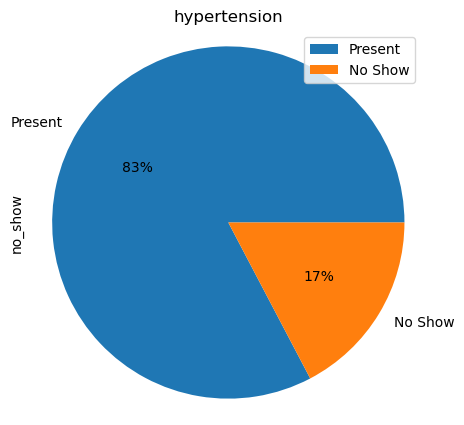

In [ ]:
pie(df, 'hypertension')

<b>Conclusion:</b> Almost the same ratio as the normal no show ratio. <u>No Correlation</u>

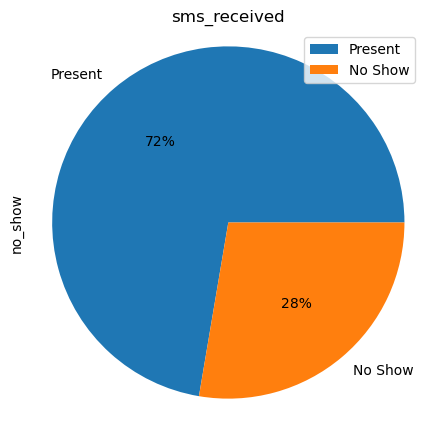

In [ ]:
pie(df, 'sms_received')

<b>Conclusion:</b> 8% increase in no shows after receiving SMS notification.

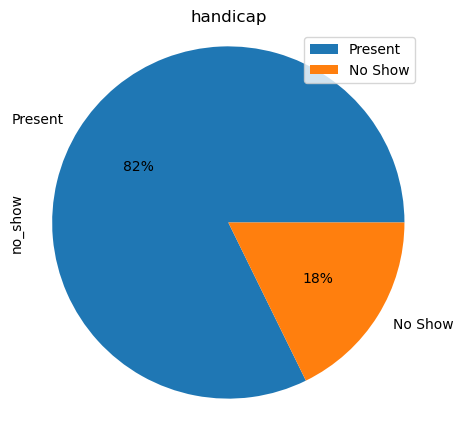

In [ ]:
pie(df, 'handicap')

<b>Conclusion:</b> Almost the same ratio as the normal no show ratio. <u>No Correlation</u>

### Question 8: What is the effect of age on no shows?

Break 'age' column down into a new 'age_group' column to make it easier to plot the correlation between age & no shows.

In [ ]:
df.loc[df['age']<= 15, 'age_group'] = '1-15'
df.loc[df['age'].between(16, 25), 'age_group'] = '16-25'
df.loc[df['age'].between(26, 40), 'age_group'] = '26-40'
df.loc[df['age'].between(41, 55), 'age_group'] = '41-55'
df.loc[df['age'].between(56, 65), 'age_group'] = '56-65'
df.loc[df['age']>65, 'age_group'] = 'Above 65'

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106977 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patientid        106977 non-null  float64       
 1   gender           106977 non-null  object        
 2   scheduled_day    106977 non-null  datetime64[ns]
 3   appointment_day  106977 non-null  datetime64[ns]
 4   age              106977 non-null  int64         
 5   neighbourhood    106977 non-null  object        
 6   scholarship      106977 non-null  bool          
 7   hypertension     106977 non-null  bool          
 8   diabetes         106977 non-null  bool          
 9   alcoholism       106977 non-null  bool          
 10  handicap         106977 non-null  int64         
 11  sms_received     106977 non-null  bool          
 12  no_show          106977 non-null  bool          
 13  buffer           106977 non-null  int64         
 14  weekday          106

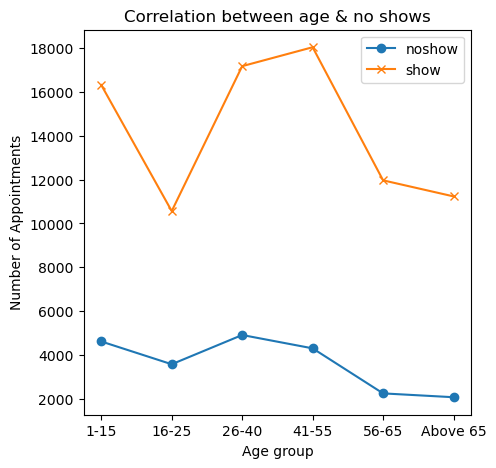

In [ ]:
# day_order array will be used below to arrange the age groups in the correct order on x-axis
day_order = np.array(['1-15', '16-25', '26-40', '41-55', '56-65', 'Above 65'])
# get the age_group values that match the attached mask 
# then group the values & count them
# then arrange the days on the x-axis using .loc[]
df['age_group'][noshow].value_counts().loc[day_order].plot.line(label='noshow', figsize=(5, 5), marker='o')
df['age_group'][show].value_counts().loc[day_order].plot.line(label='show', figsize=(5, 5), marker='x')
plt.title('Correlation between age & no shows')
plt.xlabel('Age group')
plt.ylabel('Number of Appointments')
plt.legend()

<b>Conclusion:</b>
* Kids 1-15 have a high attendance ratio
* Amount of appointments dip during teen years up to mid 20s
* Amount of appointments spike starting in the 30s
* Amount of appointments & attendance ratio peaks during late 50s and early 60s
* All metrics drop drastically starting mid 60s

<a id='conclusions'></a>
## Conclusions

1) Only 20% of the appointments are no shows<br>
2) Top 10 neighbourhoods to record no shows are:
    - Jardim Camburi
    - Maria Ortiz
    - Itarare
    - Resistencia
    - Centro
    - Jesus de Nazareth
    - Jardim da Penha
    - Caratoira
    - Tabuazeiro
    - Bonfim<br>
3) Most patients book appointments close to the day they call<br>
4) When the time between the booking day & the appointment day increases, no shows increase as well.<br>
5) No correlation between the day of the week on which the appointment is booked, and not showing up.<br>
6) Males and Females have an almost identical no show ratio.<br>
7) Patients without scholarship are 4% more likely to attend their scheduled appointment.<br>
8) No correlation between diabetes, alcoholism, hypertension, or handicap and not showing up.<br>
9) 8% increase in no shows after receiving SMS<br>
10) Kids 1-15 have a high attendance ratio<br>
11) Amount of appointments dip during teen years up to mid 20s<br>
12) Amount of appointments spike starting in the 30s<br>
13) Amount of appointments & attendance ratio peaks during late 50s and early 60s<br>
14) All metrics drop drastically starting mid 60s

### Limitations
* Breakdown of handicapped patients handicaps (what kind of handicap is it?)
* Distance between neighbourhood and closest hospital/clinic
* Medical speciality column should be added (Internal/Neurology/Pediatrics/Psychiatry/etc)
* Method of booking column should be added (Phone Call/Text/Email/Google Form/etc)
* ScheduledDay column should include accurate time to measure the correlation between time of day and no shows.
    * Morning vs Afternoon vs Evening